## Project Description
Prepare a prototype machine learning model for Zyfra. The company is engaged in developing efficient solutions for heavy industry.

Your model should be able to predict the amount of gold extracted or recovered from gold ore. There are data related to the extraction and refining process of gold ore that you can use.

Eventually, the model is expected to help create a more efficient production process and eliminate parameters that are not profitable.

You need to:

Prepare the available data
Run data analysis
Develop and train the model
To complete this project, you may need to use documentation from the Pandas, Matplotlib, and Sklearn libraries.

## Process Technology
How to extract gold from gold ore? Let's take a look at the stages of this extraction process.
The mined ore undergoes primary processing to obtain a coarser ore mixture or feed. The results of that process are used as feedstock for flotation (aka the process to produce a coarser concentrate). After flotation, the resulting particles go through a two-stage refining process.

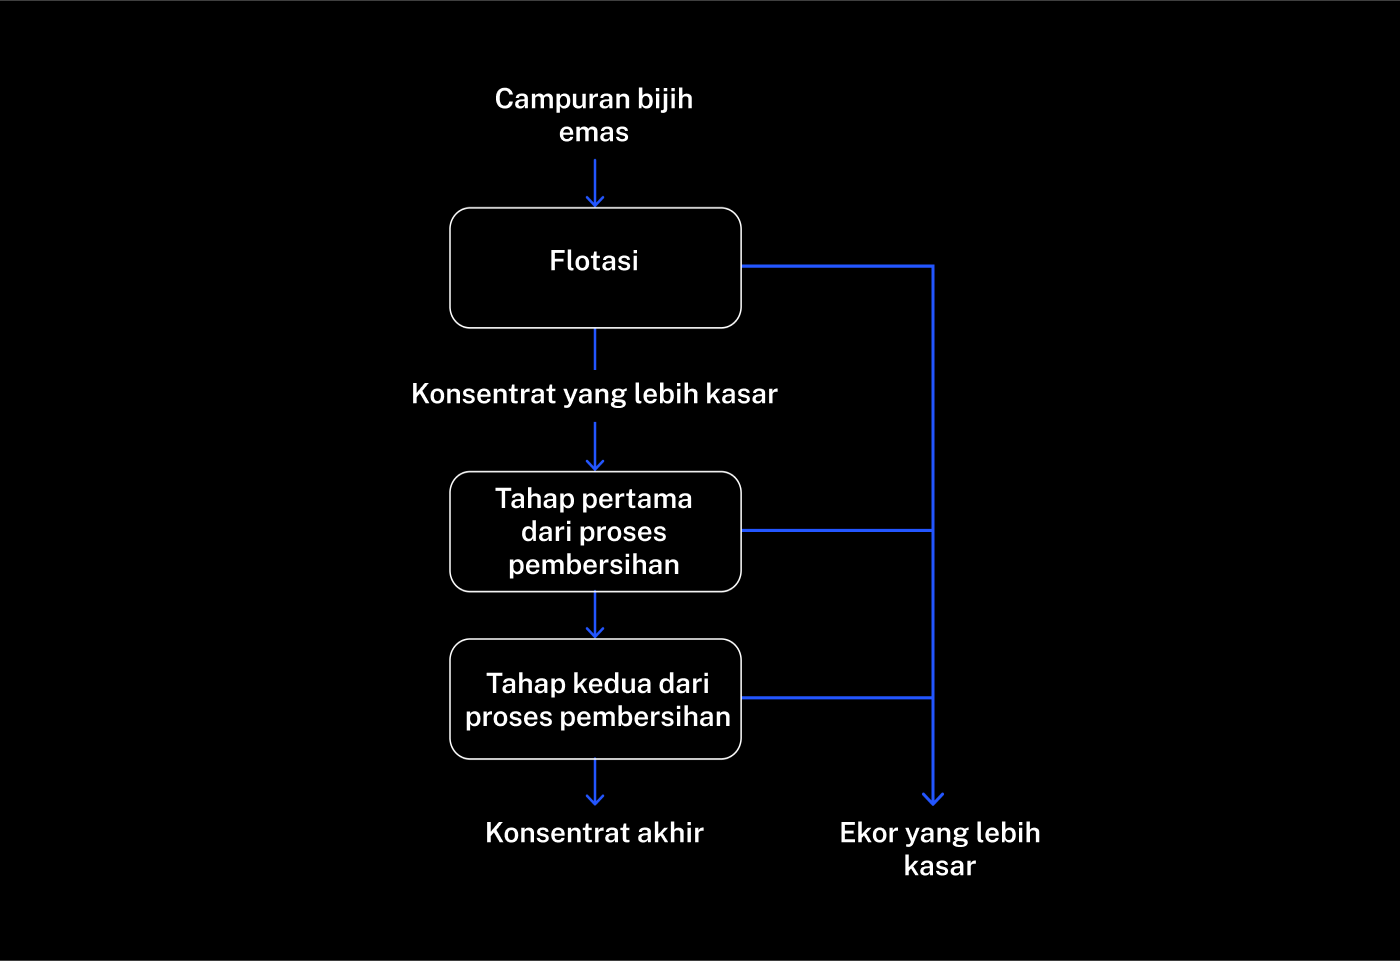

Let's break down the process:

1. Flotation

The gold ore mixture is fed into a float tank to obtain Au concentrate and coarser tails (product residue with low concentration levels of precious metals).

The stability of this process is affected by the volatility and non-optimal physicochemical state of the flotation pulp (a mixture of solid particles and liquid).

2. Refining

The coarser Au concentrate undergoes two stages of refining. After the refining process, we will also have a final metal concentration grade and a new tail.

## Data description
#### Process technology

- Rougher feed - raw material for the flotation process
- Rougher additions (or reagent additions) - reagents for flotation: Xanthate, Sulphate, Depressant
- Xanthate - flotation activator or activators
- Sulphate - sodium sulphide, specific to this process
- Depressant - sodium silicate
- Rougher process - flotation
- Rougher tails - product residue
- Float banks - flotation unit
- Cleaner process - purification
- Rougher Au - coarser gold concentrate
- Final Au - final gold concentrate
- Parameters of each stage are available

- air amount - air volume
- fluid levels
- feed size - feed particle size
- feed rate


#### Feature naming

Here is how to name the features:

[stage].[parameter_type].[parameter_name]

Example: rougher.input.feed_ag

Possible values for [stage]:

- rougher - flotation
- primary_cleaner - first purification
- secondary_cleaner - second purification
- final - final characteristics

Possible values for [parameter_type]:

- input - raw material parameters
- output - product parameters
- state - a parameter indicating the characteristics of the current stage
- calculation - characteristic calculation

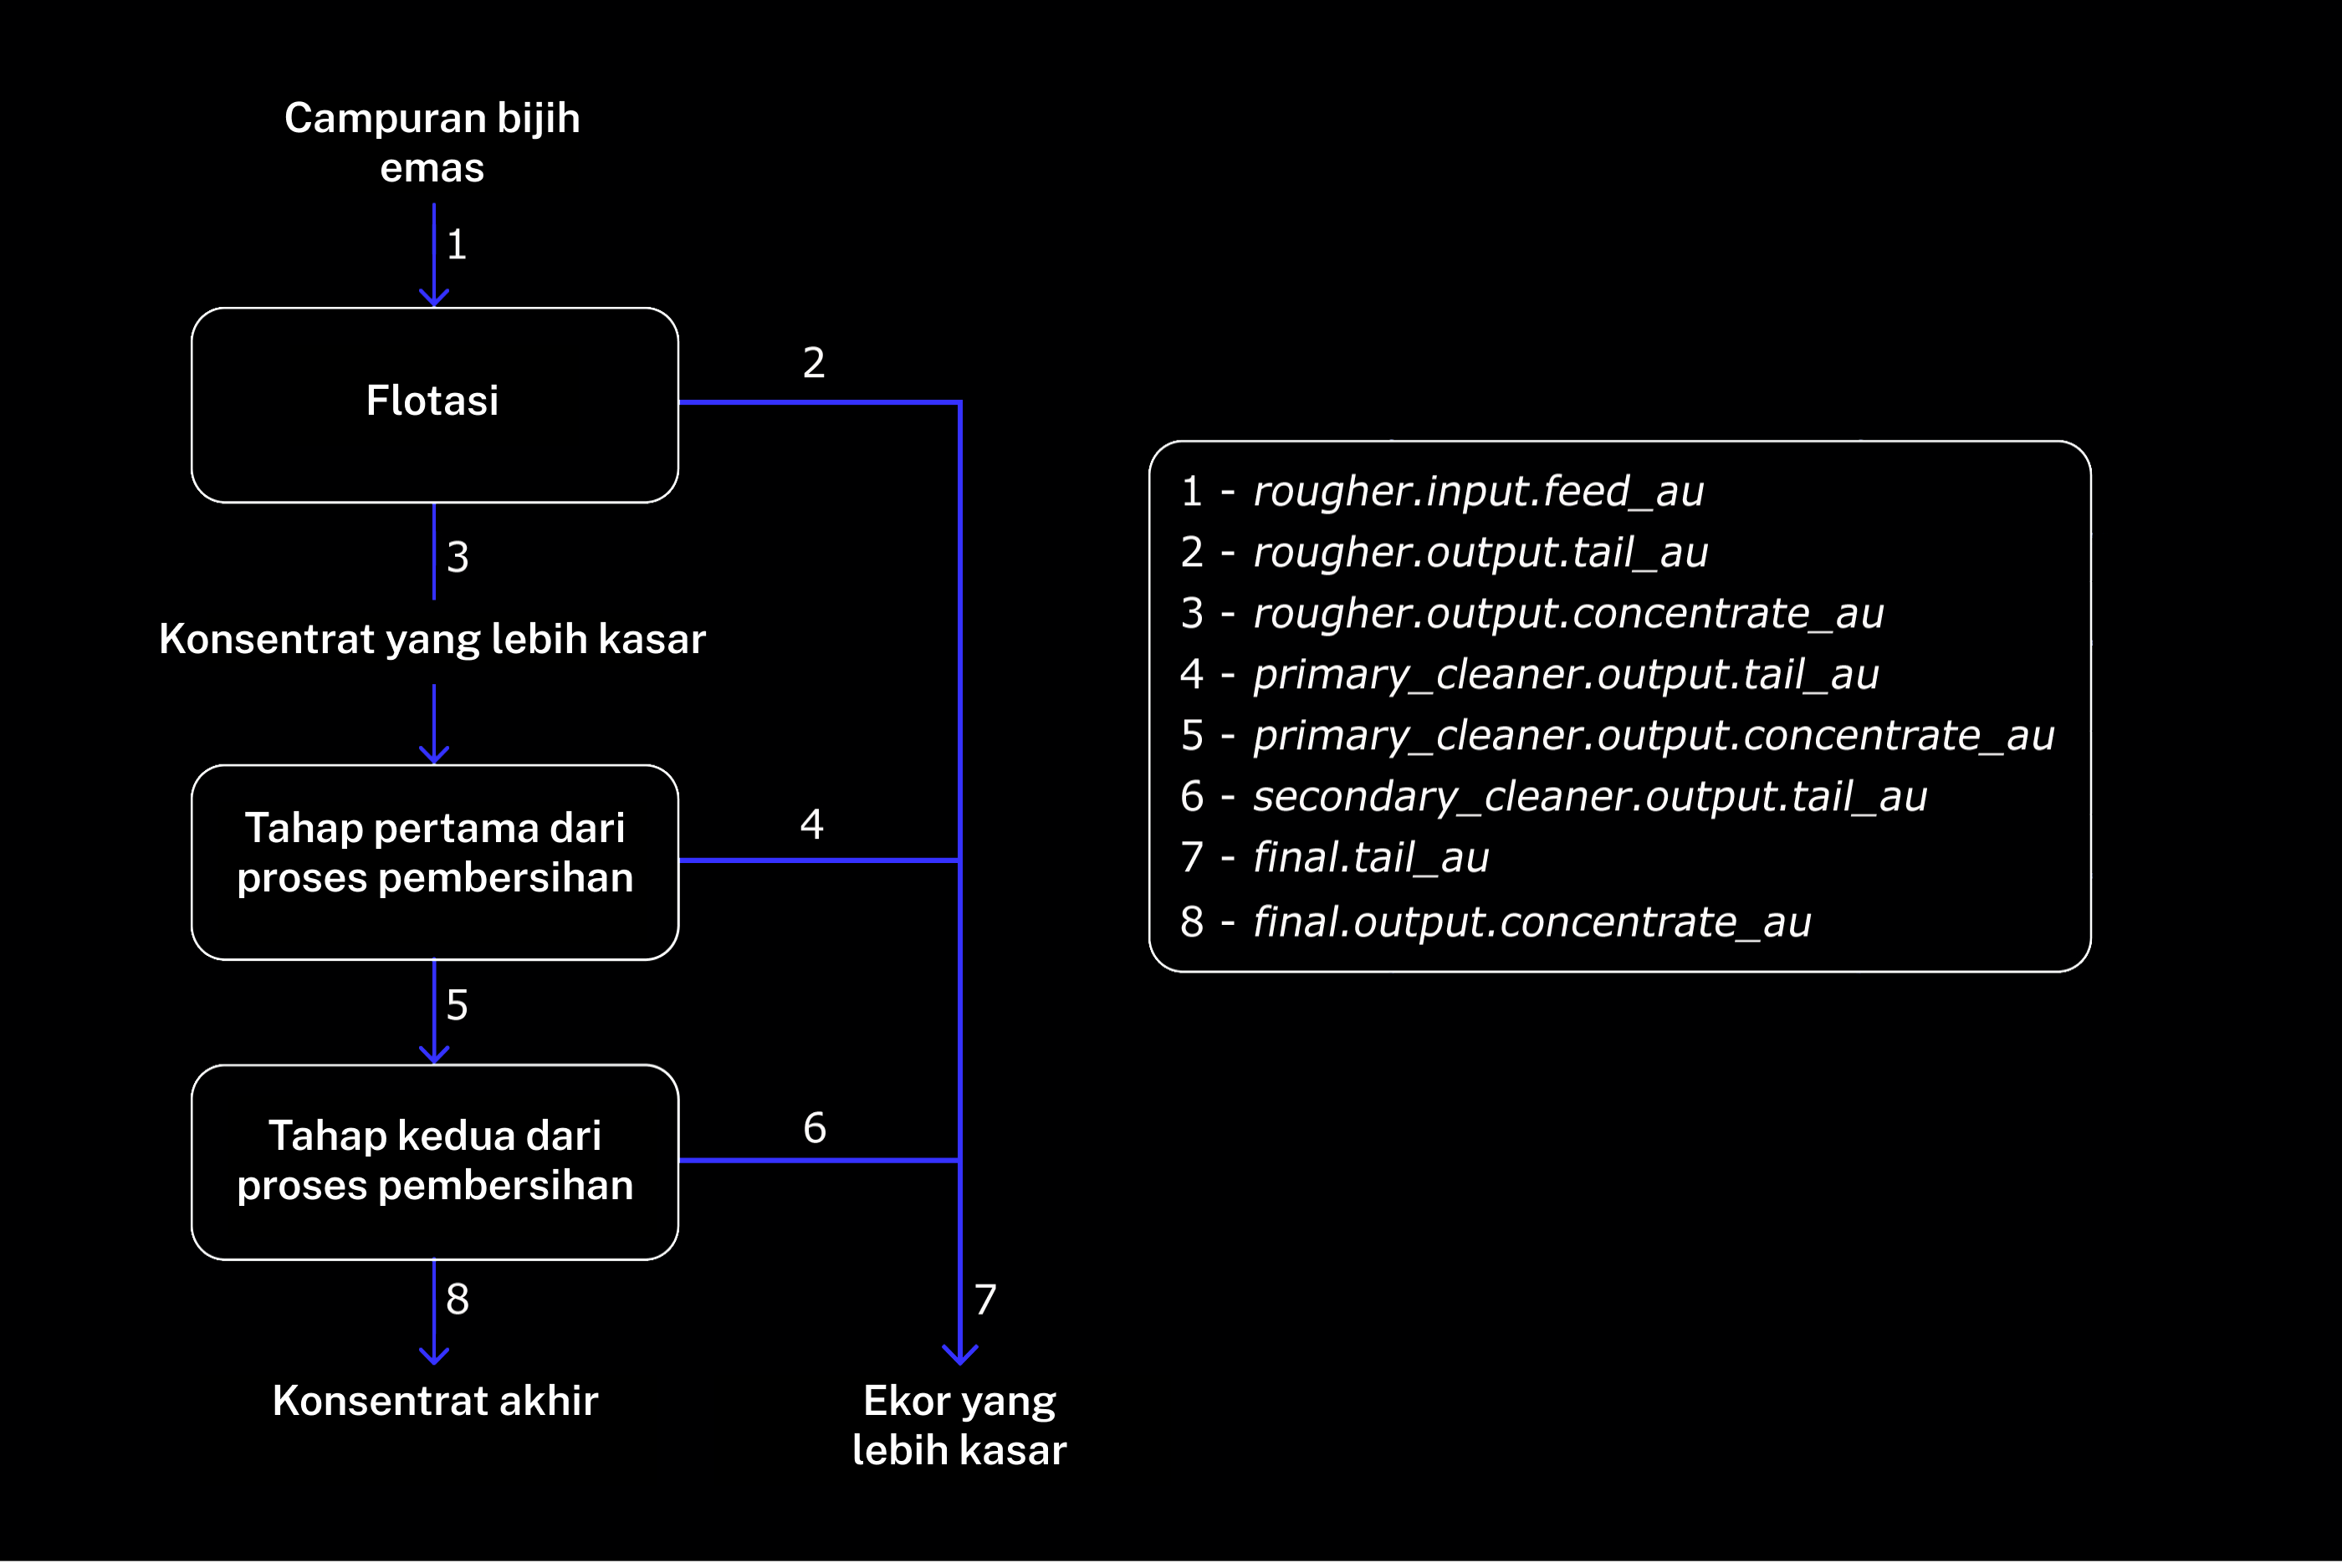

#### Calculation for recovery
You need to simulate the process of gold recovery from gold ore.

Use the following formula to simulate the recovery process:
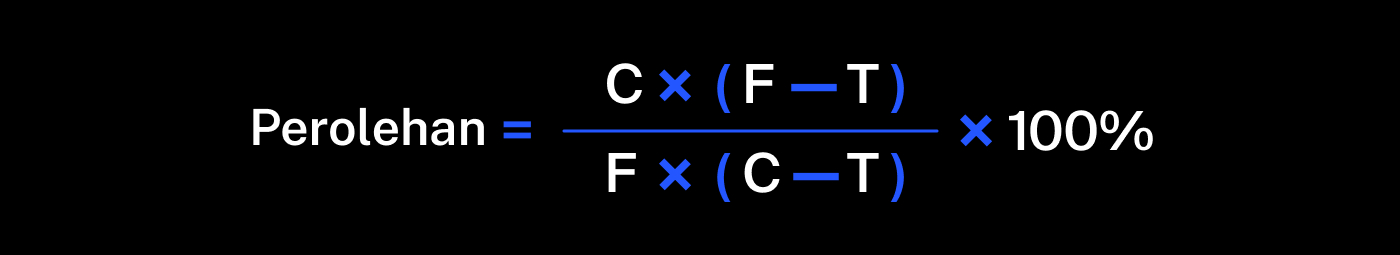

With:
<br>
C - percentage of gold in the concentrate right after the flotation process (to find the recovery of the coarser concentrate)/ after refining (to find the recovery of the final concentrate)<br>
F - percentage of gold in the feed before the flotation process (to find the coarser concentrate recovery)/ in the concentrate right after the flotation process (to find the final concentrate recovery)<br>
T - percentage of gold in the coarser tail, right after the flotation process (to find the coarser concentrate recovery)/ after refining (to find the final concentrate recovery)<br><br>
To predict the coefficient, you need to find the percentage of gold in the concentrate and the tails. Remember that both the final concentrate and the coarser concentrate are equally important.

#### Evaluation metrics
To solve the problem at hand, we will need a new metric. It is called sMAPE (symmetric Mean Absolute Percentage Error). 

sMAPE is similar to MAE, except that sMAPE is expressed in relative values instead of absolute values. So, why is this metric called symmetrical? Well, that's because sMAPE takes into account the scale of both the target and the prediction.

Here is how to calculate sMAPE:
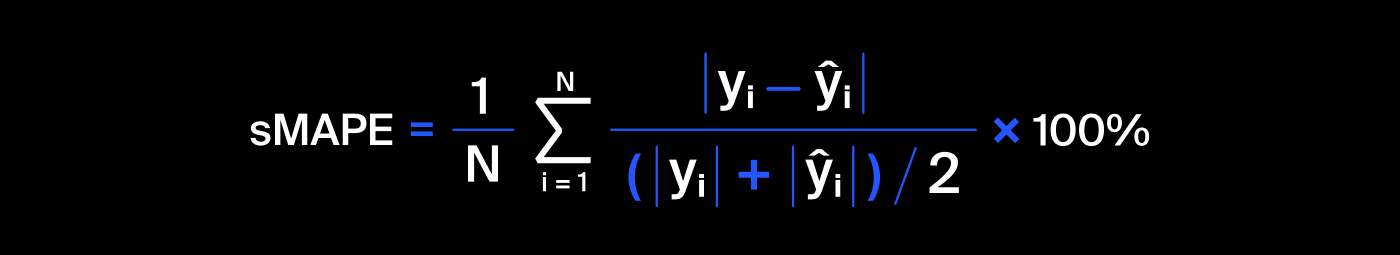

We need to predict two values:

Rougher concentrate rougher.output.recovery
Final concentrate recovery final.output.recovery
The last metric includes two values:
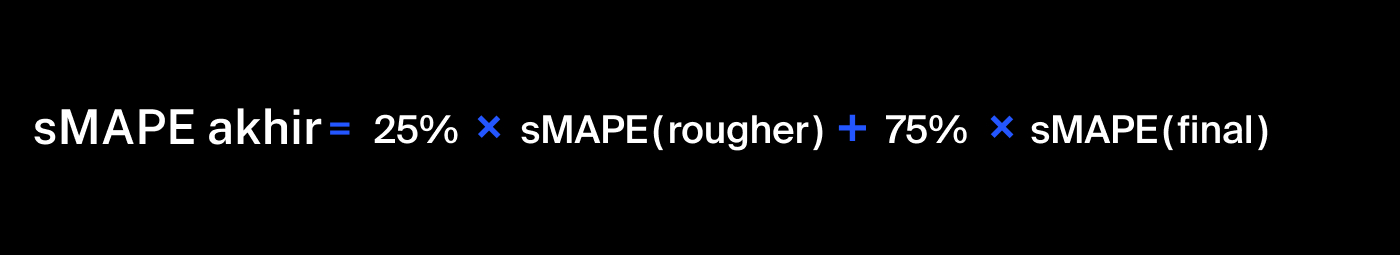

## Import Library

In [24]:
# Import Library untuk mengolah data
import pandas as pd, numpy as np

# Import Library untuk data viz
import matplotlib.pyplot as plt, seaborn as sns

# Import Library untuk Statistic
from scipy.stats import chi2_contingency, levene


# Import Library untuk Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Import Library untuk Evaluasi Model
from sklearn.metrics import confusion_matrix, roc_auc_score

## Load dataset

### Buka file dan pelajari datanya.

In [25]:
# Load data train
train_path = 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv?etag=68f7294d2022296464fd4d705519843c'
train = pd.read_csv(train_path)
train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [26]:
# Load data test
test_path = 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv'
test = pd.read_csv(test_path)
test.head(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [27]:
# Load full data
full_path = 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv'
full = pd.read_csv(full_path)
full.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


## Data Quality Checking

In [28]:
# Melakukan pengecekan info data train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [29]:
# Melakukan pengecekan info data test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [30]:
# Melakukan pengecekan info full data
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


<div class="alert-info">
    

<b>Proses teknologi</b>

Rougher feed — bahan mentah untuk proses flotasi <br>
Rougher additions (atau reagent additions) — reagen untuk flotasi: Xanthate, Sulphate, Depressant <br>
Xanthate — penggerak atau aktivator flotasi <br>
Sulphate — natrium sulfida, khusus untuk proses ini <br>
Depressant — natrium silikat <br>
Rougher process — flotasi <br>
Rougher tails — residu produk <br>
Float banks — unit flotasi <br>
Cleaner process — pemurnian <br> 
Rougher Au — konsentrat emas yang lebih kasar <br>
Final Au — konsentrat emas akhir <br>
Parameter dari setiap tahapan yang tersedia <br>
air amount — volume udara <br>
fluid levels <br>
feed size — ukuran partikel umpan <br>
feed rate <br>

    
    
<b>Penamaan fitur</b> <br>
    
Berikut merupakan cara untuk memberikan nama pada fitur-fitur yang ada: <br>
    <b> [stage].[parameter_type].[parameter_name]</b> <br>
<br>
Nilai yang memungkinkan untuk [stage]: <br>
rougher — flotasi <br>
primary_cleaner — pemurnian pertama <br>
secondary_cleaner — pemurnian kedua <br>
final — karakteristik akhir<br>
    <br>
Nilai yang memungkinkan untuk [parameter_type]:<br>
input — parameter bahan mentah<br>
output — parameter produk <br>
state — parameter yang menunjukkan karakteristik tahapan saat ini <br>
calculation — perhitungan karakteristik <br>




In [31]:
# Melakukan pengecekan duplikait pada data train
print(f'Nilai duplikat pada data training : {train.duplicated().sum()}')

Nilai duplikat pada data training : 0


In [32]:
# Melakukan pengecekan duplikait pada data test
print(f'Nilai duplikat pada data test : {test.duplicated().sum()}')

Nilai duplikat pada data test : 0


In [33]:
# Melakukan pengecekan duplikait pada full data
print(f'Nilai duplikat pada full data : {full.duplicated().sum()}')

Nilai duplikat pada full data : 0


<div class="alert-info">
    

<b> INSIGHT </b>
    
 
- Banyak nilai hilang pada data training maupun test, sehingga perlu dilakukan sesuatu untuk mengisi nilai hilang tersebut.
- Type data sudah sesuai
- Tidak terdapat nilai duplikat pada kedua data
- data train memiliki lebih banyak kolom dari pada data test



## Data Preparation

### Periksa apakah perolehan emas telah dihitung dengan benar. Menggunakan training set, hitung perolehan untuk fitur rougher.output.recovery. Temukan MAE antara perhitunganmu dan nilai fitur. Tunjukkan apa yang kamu temukan.

<div class="alert-info">
    

<b> Rumus perhitungan perolehan </b>
    
 # perolehan = (c * (f - t)) / (f * (c - t))
    
- C — persentase emas dalam konsentrat tepat setelah proses flotasi (untuk menemukan perolehan konsentrat yang lebih kasar)/setelah dilakukan pemurnian (untuk menemukan perolehan konsentrat akhir) <br>
- F — persentase emas dalam feed sebelum proses flotasi (untuk menemukan perolehan konsentrat yang lebih kasar)/ dalam konsentrat tepat setelah proses flotasi (untuk menemukan perolehan konsentrat akhir)<br>
- T — persentase emas dalam ekor yang lebih kasar, tepat setelah proses flotasi (untuk menemukan perolehan konsentrat yang lebih kasar)/setelah dilakukan pemurnian (untuk menemukan perolehan konsentrat akhir)<br>




In [34]:
# C adalah Emas Setelah proses flotasi yang konsentratnya lebih kasar artinya :
# rougher — flotasi, Output dan concentrate - hasil akhir yang kasar
c = train['rougher.output.concentrate_au']

# F adalah Emas sebelum dilakukan flotasi artinya :
# Rougher feed — bahan mentah untuk proses flotasi
f = train['rougher.input.feed_au']

# T adalah Ekor Emas setelah proses flotasi artinya :
# Output Tail - Hasil akhir ekor emas
t = train['final.output.tail_au']



perolehan = (c * (f - t)) / (f * (c - t))

In [35]:
# Melakukan pengecekan nilai perolehan
perolehan.head(10)

0    0.750881
1    0.738520
2    0.728442
3    0.730246
4    0.713417
5    0.737292
6    0.737644
7    0.749165
8    0.744548
9    0.752113
dtype: float64

In [36]:
# Menghitung MAE
abs(train['rougher.output.recovery'] - perolehan).mean()

81.79275230758236

<div class="alert-info">
    

<b> INSIGHT </b>
    
 
- Nilai rata-rata kesalahan(MAE) pada data tersebut yaitu ±81.8

### Analisis fitur-fitur yang tidak tersedia pada test set. Apa saja parameter-parameter ini? Tipe apakah parameter-parameter tersebut?

In [37]:
# Memeriksa kolom mana saja yang tidak terdapat pada kolom test
unavailable_cols = [column for column in train.columns if column not in test.columns]
unavailable_cols

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [38]:
# Membagi X train dan y train
train = train.loc[(~train['rougher.output.recovery'].isnull()) & (~train['final.output.recovery'].isnull())]
X_basic = train.drop(unavailable_cols, axis=1).drop('date', axis=1)
y_basic = train[['rougher.output.recovery', 'final.output.recovery']]

### Melakukan pra-pemrosesan data.


In [39]:
# Mengisi nilai missing value dengan nilai median
for col in X_basic.columns:
    median = X_basic[col].median()
    X_basic[col] = X_basic[col].fillna(median)
    test[col] = test[col].fillna(median)

In [40]:
# Melakukan pegecekan nilai yang hilang pada data X_basic
X_basic.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

In [41]:
# Melakukan pegecekan nilai yang hilang pada data test
test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

<div class="alert-info">
    

<b> Insight </b>
    
 
- Sudah tidak terdapat nilai yang hilang

In [42]:
# Train val split
X_train, X_val, y_train, y_val = train_test_split(X_basic, y_basic, test_size=0.25, random_state=12)

In [43]:
X_train

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5506,193.161129,15.031544,8.630,1.001468,1399.480783,-498.667604,1403.328812,-500.934124,1397.299330,-499.411965,...,12.041835,-499.382039,8.064465,-499.513122,8.013113,-500.528630,5.056763,-499.696656,30.011627,-499.701991
7801,127.705264,7.010819,7.200,0.317139,1721.056627,-500.096018,1750.214054,-500.149184,1748.349877,-501.165221,...,25.015747,-400.460101,23.056137,-399.871178,32.448441,-450.345160,23.984063,-449.824393,29.985001,-500.450414
12612,135.368005,8.021670,6.600,1.319107,1698.938992,-498.907878,1701.618980,-499.957422,1699.383271,-497.050291,...,19.967710,-500.309010,15.132387,-499.777450,10.981455,-499.453035,8.991892,-499.961007,10.976523,-499.410786
12390,147.517765,8.015812,7.250,1.490049,1598.353094,-500.893645,1599.492949,-499.716232,1599.982138,-501.967799,...,20.042138,-500.696222,14.995391,-500.216792,10.962782,-500.672944,9.050243,-500.004431,10.963025,-502.469728
9409,139.767381,11.965059,7.490,1.004778,1699.615871,-498.579444,1699.007765,-499.775321,1701.152599,-499.400774,...,17.997446,-499.443669,12.996310,-379.699625,17.978916,-499.343183,13.060813,-499.930302,19.978839,-499.039949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,167.479841,10.000668,7.522,0.908285,1599.653386,-499.496483,1599.506528,-499.557807,1600.789360,-503.436140,...,15.037800,-399.939335,4.962129,-399.745299,9.948554,-400.497535,4.928873,-400.311897,22.944352,-500.660028
8601,95.253677,4.934612,7.730,0.392645,1762.176973,-499.413614,1745.861173,-499.054858,1748.338687,-500.933113,...,25.010092,-400.566407,23.049022,-400.188593,25.982728,-451.170404,23.933275,-449.867310,29.992956,-500.327969
3964,80.270415,4.521701,7.200,1.086553,1700.428931,-500.795876,1696.905945,-500.473909,1599.425062,-499.427015,...,16.990154,-500.440257,9.046930,-499.091025,17.043289,-499.089010,8.048207,-500.266127,25.001715,-497.222957
11175,151.496325,5.492496,6.700,1.087750,1353.648343,-499.785574,1344.172650,-498.969611,1348.306104,-499.096919,...,14.522420,-502.400608,10.939258,-401.562357,13.989922,-501.256176,11.012383,-500.082454,15.004584,-500.351318


In [44]:
# Membersihkan data testing dari kolom yang bukan prediktor
X_test = test.drop('date', axis=1)

## Analisis data eksploratif (EDA) 

### Membuat catatan terkait bagaimana konsentrasi logam (Au, Ag, Pb) berubah, 
tergantung pada tahap pemurniannya.

In [45]:
train.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

#### Emas (Au)

In [46]:
# Melihat informasi dari proses awal hingga akhir proses emas
flow_emas = train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']].median().reset_index()
flow_emas.columns = ['flow', 'concentrate']
flow_emas

,flow,concentrate
0,rougher.input.feed_au,7.649138
1,rougher.output.concentrate_au,19.947312
2,primary_cleaner.output.concentrate_au,33.225835
3,final.output.concentrate_au,44.872436


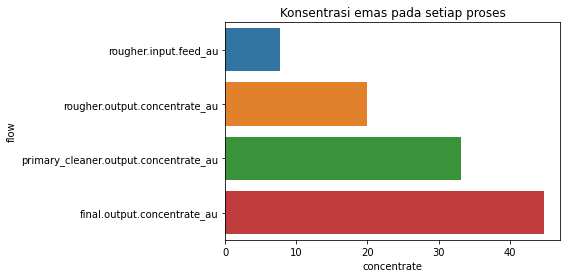

In [47]:
# Melihat distribusi proses emas
plt.title('Konsentrasi emas pada setiap proses')
sns.barplot(data=flow_emas, x='concentrate', y='flow')
plt.show()

<div class="alert-info">
    

<b> Insight </b>
    
- Pada setiap proses konsentrasi emas terus bertambah

#### Silver (Ag)

In [48]:
# Melihat informasi dari proses awal hingga akhir proses Silver
flow_silver = train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].median().reset_index()
flow_silver.columns = ['flow', 'concentrate']
flow_silver

,flow,concentrate
0,rougher.input.feed_ag,8.156092
1,rougher.output.concentrate_ag,11.747362
2,primary_cleaner.output.concentrate_ag,8.226247
3,final.output.concentrate_ag,4.994652


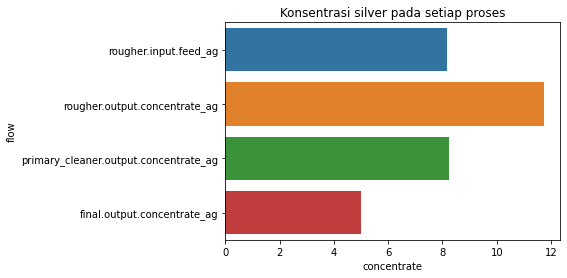

In [49]:
# Melihat distribusi proses Silver
plt.title('Konsentrasi silver pada setiap proses')
sns.barplot(data=flow_silver, x='concentrate', y='flow')
plt.show()

<div class="alert-info">
    

<b> Insight </b>
    
- Konsentrasi Silver terbanyak pada saat selesai proses flotasi, sedangkan pada proses selanjutnya hingga akhir terus berkurang.

#### Timbal (Pb)

In [50]:
# Melihat informasi dari proses awal hingga akhir proses Timbal
flow_timbal = train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].median().reset_index()
flow_timbal.columns = ['flow', 'concentrate']
flow_timbal

,flow,concentrate
0,rougher.input.feed_pb,3.422677
1,rougher.output.concentrate_pb,7.760435
2,primary_cleaner.output.concentrate_pb,9.933520
3,final.output.concentrate_pb,10.297144


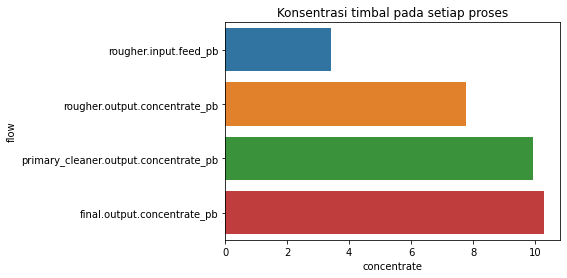

In [51]:
# Melihat distribusi proses Timbal
plt.title('Konsentrasi timbal pada setiap proses')
sns.barplot(data=flow_timbal, x='concentrate', y='flow')
plt.show()

<div class="alert-info">
    

<b> Insight </b>
    
- Pada setiap proses konsentrasi timbal terus bertambah

### Bandingkan distribusi ukuran partikel feed dalam training set dan test set. 
Jika distribusinya bervariasi secara signifikan, evaluasi model akan salah.

In [52]:
# Membuat function uji variasi
def levene_variance(series1, series2, alpha=0.05):
    p_value_levene = levene(series1, series2).pvalue
    print(f'P-Value: {p_value_levene}')
    print(f'Alpha  : {alpha}')
    if p_value_levene >= alpha:
        print('H0 Diterima: Kedua data memiliki variansi yang sama')
    else:
        print('H1 Diterima: Kedua data memiliki variansi yang tidak sama')

In [53]:
# Melakukan perbandingan antara data train dan test tepatnya pada partikel feed
feeds = [column for column in X_basic.columns if 'feed' in column]
for column in feeds:
    print(column)
    levene_variance(X_basic[column], X_test[column])
    print('--------------------')

primary_cleaner.input.feed_size
P-Value: 0.29160196970934205
Alpha  : 0.05
H0 Diterima: Kedua data memiliki variansi yang sama
--------------------
rougher.input.feed_ag
P-Value: 1.0792232205856297e-98
Alpha  : 0.05
H1 Diterima: Kedua data memiliki variansi yang tidak sama
--------------------
rougher.input.feed_pb
P-Value: 8.907839844693589e-11
Alpha  : 0.05
H1 Diterima: Kedua data memiliki variansi yang tidak sama
--------------------
rougher.input.feed_rate
P-Value: 2.2417502903873844e-138
Alpha  : 0.05
H1 Diterima: Kedua data memiliki variansi yang tidak sama
--------------------
rougher.input.feed_size
P-Value: 0.08369869047847579
Alpha  : 0.05
H0 Diterima: Kedua data memiliki variansi yang sama
--------------------
rougher.input.feed_sol
P-Value: 4.3590996427755585e-246
Alpha  : 0.05
H1 Diterima: Kedua data memiliki variansi yang tidak sama
--------------------
rougher.input.feed_au
P-Value: 3.520234132995181e-44
Alpha  : 0.05
H1 Diterima: Kedua data memiliki variansi yang tidak 

<div class="alert-info">
    

<b> Insight </b>

Bila dilakukan pengecekan pada feed emas, silver dan timbal.
    
- Kedua data tidak memiliki varian yang sama

### Pertimbangkan total konsentrasi semua substansi di tahap yang berbeda: 
feed mentah, konsentrasi yang lebih kasar, dan konsentrasi akhir. Apakah kamu melihat adanya nilai abnormal dalam distribusi total? Jika ya, apakah perlu menghapus nilai-nilai tersebut dari kedua sampel? Jelaskan yang kamu temukan dan singkirkan anomalinya.

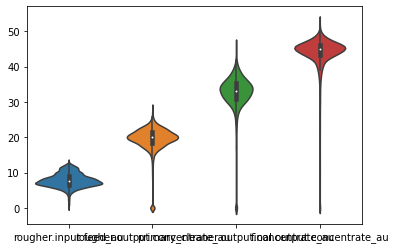

In [54]:
# Mendapatkan informasi proses emas dan distribusinya
proses_emas = train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
sns.violinplot(data=proses_emas)
plt.show()

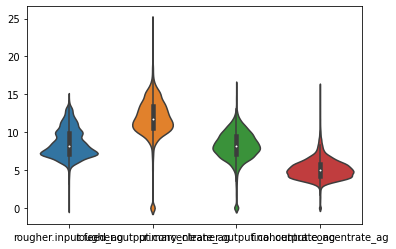

In [55]:
# Mendapatkan informasi proses silver dan distribusinya
proses_silver = train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
sns.violinplot(data=proses_silver)
plt.show()

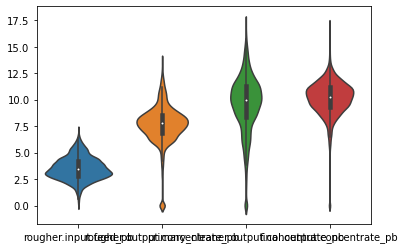

In [56]:
# Mendapatkan informasi proses timbal dan distribusinya
proses_timbal = train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
sns.violinplot(data=proses_timbal)
plt.show()

<div class="alert-info">
    

<b> Insight </b>

terdapat beberapa distribusi yang terlihat memiliki outlier.
Namun outlier tersebut tidak dikikis atau dipotong karena hal tersebut juga merupakan kemungkinan jika memang konsentrasi yang dihasilkan bisa saja nihil ataupun lebih banyak dari biasanya.

## Model Creation

### Buat sebuah fungsi yang digunakan untuk menghitung nilai sMAPE akhir.

In [57]:
# Membuat fungsi sMAPE
def smape (y_true, y_pred):
    temp = pd.DataFrame({'true': list(y_true), 'pred': list(y_pred)})
    ape = abs(temp['true'] - temp['pred']) / ((abs(temp['true']) + abs(temp['pred'])) / 2)
    mape = ape.mean()
    return mape

def final_smape(y_trues, y_preds):
    y_trues = pd.DataFrame(y_trues)
    y_preds = pd.DataFrame(y_preds)
    rough_smape = smape(y_trues.iloc[:, 0], y_preds.iloc[:, 0])
    final_smape = smape(y_trues.iloc[:, 1], y_preds.iloc[:, 1])
    smape_akhir = 0.25 * rough_smape + 0.75 * final_smape
    print(f'sMAPE value: {round(smape_akhir, 2) * 100}%')
    return smape_akhir

In [81]:
y_train

,rougher.output.recovery,final.output.recovery
5506,89.043729,74.198074
7801,84.070124,67.234684
12612,95.082551,73.128130
12390,96.066653,78.055798
9409,81.515825,69.774137
...,...,...
4494,81.707631,68.961915
8601,81.988469,66.530214
3964,71.346650,64.584728
11175,80.143920,49.115669


### Lakukan pelatihan pada model yang berbeda-beda. 


#### Liner Regression

In [58]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
y_train_pred = lr.predict(X_train)
smape_train = final_smape(y_train, y_train_pred)

sMAPE value: 9.0%


In [60]:
scores = cross_val_score(lr, X_train, y_train_pred, cv=5) 
final_score = sum(scores) / len(scores) * 100
final_score

100.0

In [61]:
y_val_pred = lr.predict(X_val)
smape_train = final_smape(y_val, y_val_pred)

sMAPE value: 9.0%


In [62]:
scores = cross_val_score(lr, X_val, y_val_pred, cv=5) 
final_score = sum(scores) / len(scores) * 100
final_score

100.0

#### Decision Tree

In [63]:
dt = DecisionTreeRegressor(max_depth=8)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [64]:
y_train_pred = dt.predict(X_train)
smape_train = final_smape(y_train, y_train_pred)

sMAPE value: 7.000000000000001%


In [65]:
scores = cross_val_score(dt, X_train, y_train_pred, cv=5) 
final_score = sum(scores) / len(scores) * 100
final_score

59.77561024408523

In [66]:
y_val_pred = dt.predict(X_val)
smape_train = final_smape(y_val, y_val_pred)

sMAPE value: 8.0%


In [67]:
scores = cross_val_score(dt, X_val, y_val_pred, cv=5) 
final_score = sum(scores) / len(scores) * 100
final_score

55.399879562761065

#### Random Forest

In [68]:
rf = RandomForestRegressor(n_estimators=10, max_depth=18)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=18, n_estimators=10)

In [69]:
y_train_pred = rf.predict(X_train)
smape_train = final_smape(y_train, y_train_pred)

sMAPE value: 5.0%


In [70]:
scores = cross_val_score(rf, X_train, y_train_pred, cv=5) 
final_score = sum(scores) / len(scores) * 100
final_score

70.3705541897681

In [71]:
y_val_pred = rf.predict(X_val)
smape_train = final_smape(y_val, y_val_pred)

sMAPE value: 7.000000000000001%


In [72]:
scores = cross_val_score(rf, X_val, y_val_pred, cv=5) 
final_score = sum(scores) / len(scores) * 100
final_score

75.9736582462131

<div class="alert-info">
    

<b> Insight </b>

- Model Random Forest memiliki hasil sMape yang lebih kecil dibandingkan dengan model lainnya.
- Model Liniear regression memiliki nilai cross-validation tertinggi dibanding model lainnya

## Predict data Testing

In [73]:
# Ambil kolom target dari table full agar target test dapat diketahui
target_full = full[['date', 'rougher.output.recovery', 'final.output.recovery']]

In [74]:
# Join target test dari full dengan test set
test = test.merge(target_full, on='date', how='inner')

In [75]:
# Bersihkan data testing dari kolom yang bukan prediktor
X_test = test[X_train.columns]
y_test = test[['rougher.output.recovery', 'final.output.recovery']]
X_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [76]:
# Predict Test di model Random Forest
y_test_pred = rf.predict(X_test)
smape_train = final_smape(y_test, y_test_pred)

sMAPE value: 11.0%


In [77]:
scores = cross_val_score(rf, X_test, y_test_pred, cv=5) 
final_score = sum(scores) / len(scores) * 100
final_score

53.67599003994442

In [78]:
# Predict Test di model Linear Regression
y_test_pred = lr.predict(X_test)
smape_train = final_smape(y_test, y_test_pred)

sMAPE value: 11.0%


In [79]:
scores = cross_val_score(lr, X_test, y_test_pred, cv=5) 
final_score = sum(scores) / len(scores) * 100
final_score

100.0

<div class="alert-info">
    

<b> General Conclution</b>

- Model Random Forest memiliki hasil sMape yang lebih kecil dibandingkan dengan model lainnya.
- Model Liniear regression memiliki nilai cross-validation tertinggi dibanding model lainnya